In [1]:
import pandas as pd
from google.colab import drive
# Connecting to my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df_tesla_final = pd.read_csv('/content/drive/MyDrive/606 project/df_tesla_final_year.csv')

In [3]:
df_tesla_final

,date,Open,High,Low,Close,Adj Close,Volume,mean_negative,count_negative,mean_positive,count_positive,mean_neutral,count_neutral,overall_mean_score,Next Day Open
0,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,0.478478,713,0.526242,1087,0.000283,849,0.087063,109.110001
1,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,0.484042,701,0.504059,994,0.000109,843,0.063684,110.510002
2,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,0.464406,531,0.505971,818,0.000118,725,0.080617,103.000000
3,2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,0.459947,719,0.515140,1053,0.000092,936,0.078159,118.959999
4,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,0.462105,565,0.527596,877,0.000040,680,0.095023,121.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,2024-02-06,177.210007,186.490005,177.110001,185.100006,185.100006,122676000,0.452233,138,0.492931,201,0.000774,168,0.072586,188.179993
275,2024-02-07,188.179993,189.789993,182.679993,187.580002,187.580002,111535200,0.458725,117,0.526765,231,0.000356,181,0.128445,189.000000
276,2024-02-08,189.000000,191.619995,185.580002,189.559998,189.559998,83034000,0.386224,95,0.547858,209,0.000355,180,0.160635,190.179993
277,2024-02-09,190.179993,194.119995,189.479996,193.570007,193.570007,84476300,0.474628,71,0.549697,116,0.000187,90,0.108482,192.110001


In [4]:
# Shift 'Open' column by one row to get the next day's open
next_day_open = df_tesla_final['Open'].shift(-1)

# Add the next day's open as a new column
df_tesla_final['Next Day Open'] = next_day_open
df_tesla_final.dropna(inplace=True)

In [5]:
df_tesla_final

,date,Open,High,Low,Close,Adj Close,Volume,mean_negative,count_negative,mean_positive,count_positive,mean_neutral,count_neutral,overall_mean_score,Next Day Open
0,2023-01-03,118.470001,118.800003,104.639999,108.099998,108.099998,231402800,0.478478,713,0.526242,1087,0.000283,849,0.087063,109.110001
1,2023-01-04,109.110001,114.589996,107.519997,113.639999,113.639999,180389000,0.484042,701,0.504059,994,0.000109,843,0.063684,110.510002
2,2023-01-05,110.510002,111.750000,107.160004,110.339996,110.339996,157986300,0.464406,531,0.505971,818,0.000118,725,0.080617,103.000000
3,2023-01-06,103.000000,114.389999,101.809998,113.059998,113.059998,220911100,0.459947,719,0.515140,1053,0.000092,936,0.078159,118.959999
4,2023-01-09,118.959999,123.519997,117.110001,119.769997,119.769997,190284000,0.462105,565,0.527596,877,0.000040,680,0.095023,121.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2024-02-05,184.259995,184.679993,175.009995,181.059998,181.059998,134294400,0.436861,164,0.477261,235,0.000304,238,0.063710,177.210007
274,2024-02-06,177.210007,186.490005,177.110001,185.100006,185.100006,122676000,0.452233,138,0.492931,201,0.000774,168,0.072586,188.179993
275,2024-02-07,188.179993,189.789993,182.679993,187.580002,187.580002,111535200,0.458725,117,0.526765,231,0.000356,181,0.128445,189.000000
276,2024-02-08,189.000000,191.619995,185.580002,189.559998,189.559998,83034000,0.386224,95,0.547858,209,0.000355,180,0.160635,190.179993


In [6]:
df_tesla_final.drop(columns=['Adj Close'], inplace=True)

In [7]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [8]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [9]:
pip install tensorflow

In [10]:
import numpy as np
np.random.seed(1)
import tensorflow as tf
tf.random.set_seed(2)
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM
from keras import optimizers
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
import datetime as dt
import time
plt.style.use('ggplot')

In [11]:
# Setting up an early stop
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
callbacks_list = [earlystop]

In [12]:
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []

    # Loop for training data
    for i in range(timesteps,train.shape[0]):
        X_train.append(train[i-timesteps:i])
        Y_train.append(train[i][0])
    X_train,Y_train = np.array(X_train),np.array(Y_train)

    # Loop for val data
    for i in range(timesteps,val.shape[0]):
        X_val.append(val[i-timesteps:i])
        Y_val.append(val[i][0])
    X_val,Y_val = np.array(X_val),np.array(Y_val)

    # Adding Layers to the model
    model = Sequential()
    model.add(LSTM(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                   activation = 'relu'))
    for i in range(len(hl)-1):
        model.add(LSTM(hl[i],activation = 'relu',return_sequences = True))
    model.add(LSTM(hl[-1],activation = 'relu'))
    model.add(Dense(1))
    model.compile(optimizer = optimizers.Adam(lr = lr), loss = 'mean_squared_error')

    # Training the data
    history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 0,
                        shuffle = False, callbacks=callbacks_list)
    model.reset_states()
    return model, history.history['loss'], history.history['val_loss']

In [13]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
    X_test = []
    Y_test = []

    # Loop for testing data
    for i in range(timesteps,test.shape[0]):
        X_test.append(test[i-timesteps:i])
        Y_test.append(test[i][0])
    X_test,Y_test = np.array(X_test),np.array(Y_test)
    #print(X_test.shape,Y_test.shape)

    # Prediction Time !!!!
    Y_hat = model.predict(X_test)
    mse = mean_squared_error(Y_test,Y_hat)
    rmse = sqrt(mse)
    r = r2_score(Y_test,Y_hat)
    return mse, rmse, r, Y_test, Y_hat

In [14]:
# Plotting the predictions
def plot_data(Y_test,Y_hat):
    plt.plot(Y_test,c = 'r')
    plt.plot(Y_hat,c = 'y')
    plt.xlabel('Day')
    plt.ylabel('Price')
    plt.title('Stock Prediction Graph using Multivariate-LSTM model')
    plt.legend(['Actual','Predicted'],loc = 'lower right')
    plt.show()

In [15]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
    plt.plot(train_loss,c = 'r')
    plt.plot(val_loss,c = 'b')
    plt.ylabel('Loss')
    plt.legend(['train','val'],loc = 'upper right')
    plt.show()

# **Without Sentiment**

In [16]:
# Extracting the series
series = df_tesla_final[['date','Close','Volume','Next Day Open']] # Picking the series with high correlation
series['date'] = pd.to_datetime(series['date'])
series.set_index('date', inplace=True)
print(series.shape)
print(series.tail())

(278, 3)
                 Close     Volume  Next Day Open
date                                            
2024-02-05  181.059998  134294400     177.210007
2024-02-06  185.100006  122676000     188.179993
2024-02-07  187.580002  111535200     189.000000
2024-02-08  189.559998   83034000     190.179993
2024-02-09  193.570007   84476300     192.110001


<ipython-input-16-1e1c69323ff2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['date'] = pd.to_datetime(series['date'])


In [17]:
# Train Val Test Split
train_start = dt.date(2023,1,1)
train_end = dt.date(2024,1,15)
train_data = series.loc[train_start:train_end]

val_start = dt.date(2024,1,15)
val_end = dt.date(2024,2,12)
val_data = series.loc[val_start:val_end]

test_start = dt.date(2024,1,15)
test_end = dt.date(2024,2,12)
test_data = series.loc[test_start:test_end]

print(train_data.shape,val_data.shape,test_data.shape)

(259, 3) (19, 3) (19, 3)


In [18]:
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(259, 3) (19, 3) (19, 3)


In [19]:
timesteps = 3
hl = [40,35]
lr = 1e-3
batch_size = 64
num_epochs = 250

Epoch 184: early stopping


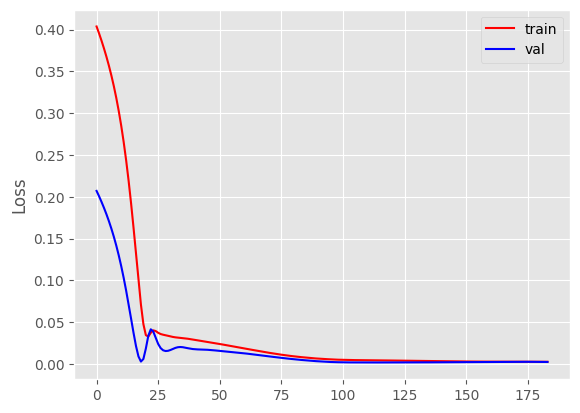

In [20]:
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

1/1 [==============================] - 0s 489ms/step
MSE = 0.0023
RMSE = 0.0480
R-Squared Score = 0.2225
NRMSE = 0.2858


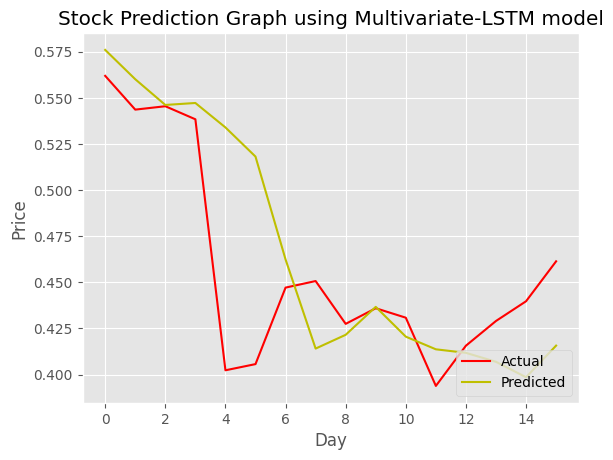

In [21]:
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,timesteps)
# Calculate the range of the true values
true_min = np.min(true)
true_max = np.max(true)
true_range = true_max - true_min

# Calculate NRMSE
nrmse = rmse / true_range  # Normalization by the range of the true values

print('MSE = {:.4f}'.format(mse))
print('RMSE = {:.4f}'.format(rmse))
print('R-Squared Score = {:.4f}'.format(r2_value))
print('NRMSE = {:.4f}'.format(nrmse))

# Plotting function
plot_data(true, predicted)

# **With Sentiment**

In [22]:
series = df_tesla_final[['date','Close','Volume','count_negative',	'count_positive',	'count_neutral','Next Day Open']]
series['date'] = pd.to_datetime(series['date'])
series.set_index('date', inplace=True)
print(series.shape)
print(series.tail())

(278, 6)
                 Close     Volume  count_negative  count_positive  \
date                                                                
2024-02-05  181.059998  134294400             164             235   
2024-02-06  185.100006  122676000             138             201   
2024-02-07  187.580002  111535200             117             231   
2024-02-08  189.559998   83034000              95             209   
2024-02-09  193.570007   84476300              71             116   

            count_neutral  Next Day Open  
date                                      
2024-02-05            238     177.210007  
2024-02-06            168     188.179993  
2024-02-07            181     189.000000  
2024-02-08            180     190.179993  
2024-02-09             90     192.110001  


<ipython-input-22-7ec93137c9d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series['date'] = pd.to_datetime(series['date'])


In [23]:
# Train Val Test Split
train_start = dt.date(2023,1,1)
train_end = dt.date(2024,1,15)
train_data = series.loc[train_start:train_end]

val_start = dt.date(2024,1,1)
val_end = dt.date(2024,2,12)
val_data = series.loc[val_start:val_end]

test_start = dt.date(2024,1,1)
test_end = dt.date(2024,2,12)
test_data = series.loc[test_start:test_end]

print(train_data.shape,val_data.shape,test_data.shape)

(259, 6) (28, 6) (28, 6)


In [24]:
# Normalisation
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(259, 6) (28, 6) (28, 6)


In [25]:
timesteps = 3
hl = [40,35]
lr = 1e-3
batch_size = 64
num_epochs = 250

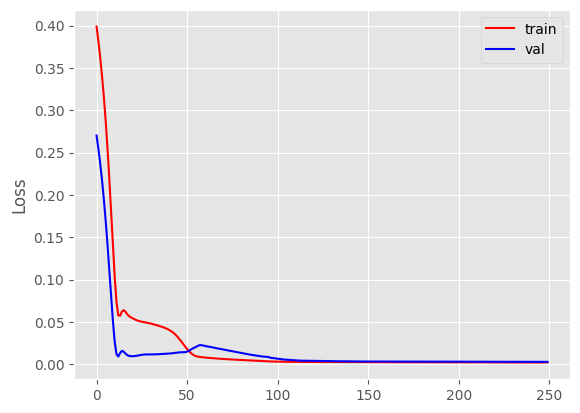

In [26]:
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
plot_error(train_error,val_error)

1/1 [==============================] - 0s 438ms/step
MSE = 0.0027
RMSE = 0.0522
R-Squared Score = 0.7423
NRMSE = 0.1628


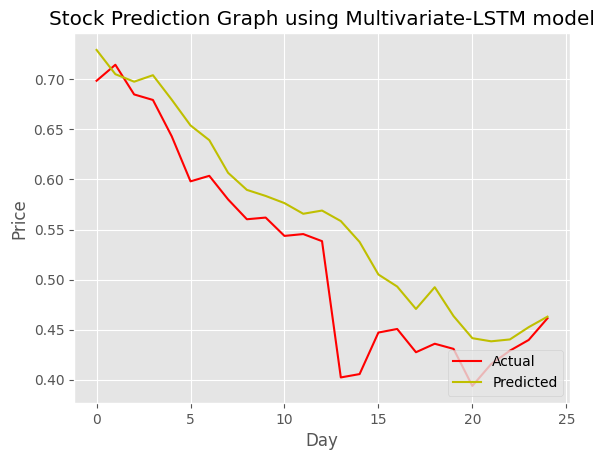

In [27]:
mse, rmse, r2_value,true,predicted = evaluate_model(model,test,timesteps)

true_min = np.min(true)
true_max = np.max(true)
true_range = true_max - true_min

# Calculate NRMSE
nrmse = rmse / true_range  # Normalization by the range of the true values

print('MSE = {:.4f}'.format(mse))
print('RMSE = {:.4f}'.format(rmse))
print('R-Squared Score = {:.4f}'.format(r2_value))
print('NRMSE = {:.4f}'.format(nrmse))

# Plotting function
plot_data(true, predicted)

If we compare the LSTM prediction results between stocks with sentiment and those without, we observe significant differences. However, it's noteworthy that regression scores outperform LSTM. As mentioned earlier, LSTM models excel at capturing temporal dependencies, utilizing features like date or timestamp alongside others to learn patterns over time. Increasing the training data from one year to five years in the future could potentially yield even better results. Currently, our Reddit data spans only one year due to resource constraints, but expanding this dataset might lead to improved outcomes